In [7]:
import numpy as np
import matplotlib.pyplot as plt

Let there be a weight W that takes input space X into output space Y. Let W have a variance of 1.

In [79]:
σ = np.sqrt(1)
real_x = np.arange(0,10,0.1)
x = np.random.uniform(0,10,1000)
real_w = [3]
real_y = real_w * real_x
y = (real_w + np.random.randn(1000) * σ) * x
y_high = real_y + 2 * σ * real_x
y_low = real_y - 2 * σ * real_x

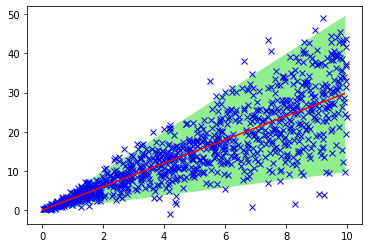

In [80]:
plt.plot(x, y, 'bx', real_x, real_y, 'r')
plt.fill_between(real_x, y_low, y_high, color="lightgreen")

Through the above graph, we can suggest that if we knew Y, we could provide a confidence interval around it where 95% of all noisy Ys would lie.

However, in the above graph, we already use the correct weights and good values of x. Consider the case of having only random (x,y) pair readings.

The problem can be mathematically stated as follows:

$$ Y = X^T W $$

Since the system for $X$ and $Y$ is over-specified, we can rely on a psseudoinverse to obtain a minimum on the least-square distance.

In [81]:
mle_w = np.linalg.pinv(np.atleast_2d(x).T) @ y
print(float(mle_w))

3.0179853635261518


Thus, we now have an estimate of W which is most likely given the data that we have seen. However, this still does not provide is the ability to provide any confidence on this weight. It is possible that if y has high variance, W may not be close to the real value, let alone optimum. Thus, we need a provision to express our uncertainty in obtaining W.

As explained in the [post](https://jaydm26.github.io/portfolio/computational-math-and-engineering/fisher-information), we discussed how the Fisher Information for Gaussian distributed Y, having a scalar weight take the input space X to Y, has the Fisher Information given by:

$$ I(w) = \sum_{i = 1}^n \dfrac{x_i x_i^T}{\sigma^2} $$

In [82]:
I = np.dot(x,x) / σ**2
print(I)

33484.0884726982


Using the Cramer-Rao inequality, we have:

$$ Var(w) \geq \dfrac{1}{I(w)} $$

Thus, letting the equality hold, we obtain the variance on W.

In [83]:
σ_w = np.sqrt(1/I)
print(σ_w)

0.005464881631274949


Thus, we can now say that we believe that W is distributed as Gaussian with a mean of 3.01678 and a variance of 0.01873. Now, it is possible to use a standard set of x values to provide a Confidence Bound on Y.

In [84]:
simulated_y1 = np.random.normal(mle_w, σ_w) * real_x
simulated_y2 = np.random.normal(mle_w, σ_w) * real_x
simulated_y3 = np.random.normal(mle_w, σ_w) * real_x
simulated_y4 = np.random.normal(mle_w, σ_w) * real_x


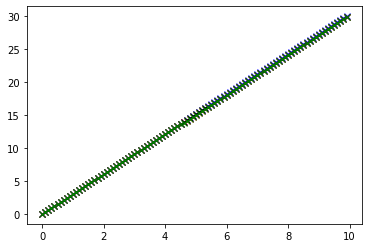

In [85]:
plt.plot(real_x, simulated_y1, 'bx')
plt.plot(real_x, simulated_y2, 'rx')
plt.plot(real_x, simulated_y3, 'kx')
plt.plot(real_x, simulated_y4, 'gx')

While these points look like they are perfectly aligned, they are not.

In [86]:
all(simulated_y1 == simulated_y2)

False

By following the properties of a Gaussian, we can say that Y is distributed as 

$$ Y(x) \sim \mathcal{N}(xW_{MLE}, x^2 \sigma_{w} ) $$

In [87]:
sampled_mean = real_x * mle_w
sampled_upper_ci = sampled_mean + 2 * (real_x ** 2) * σ_w
sampled_lower_ci = sampled_mean - 2 * (real_x ** 2) * σ_w

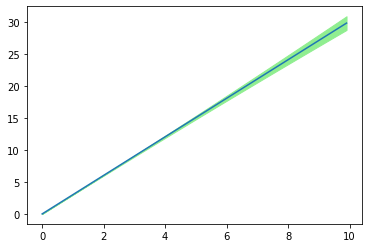

In [88]:
plt.plot(real_x, sampled_mean)
plt.fill_between(real_x, sampled_upper_ci, sampled_lower_ci, color='lightgreen')

Thus, by using Bayesian knowledge, and Statistics, we are able to provide a much tighter confidence interval on the true value of Y.